# Dimensionement bois 


base de donné liée a la compression 

source : Lignum 

In [14]:
import math

# Propriétés des matériaux (incluant bois massif et bois lamellé-collé)
materiaux = {
    # Bois massif
    "C16": {"fc_0_k": 9.5, "fm_k": 9.5, "E_0_mean": 8000, "E_0_05": 5400},
    "C24": {"fc_0_k": 12.0, "fm_k": 14.0, "E_0_mean": 11000, "E_0_05": 7400},
    "C30": {"fc_0_k": 13.5, "fm_k": 17.5, "E_0_mean": 12000, "E_0_05": 8000},
    "D30": {"fc_0_k": 13.0, "fm_k": 17.0, "E_0_mean": 10000, "E_0_05": 7000},

    # Bois lamellé-collé
    "GL24k": {"fc_0_k": 14.5, "fm_k": 16.0, "E_0_mean": 11000, "E_0_05": 9000},
    "GL24h": {"fc_0_k": 14.5, "fm_k": 16.0, "E_0_mean": 11000, "E_0_05": 9000},
    "GL28k": {"fc_0_k": 16.0, "fm_k": 18.5, "E_0_mean": 12000, "E_0_05": 10400},
    "GL28h": {"fc_0_k": 16.0, "fm_k": 18.5, "E_0_mean": 12000, "E_0_05": 10400},
    "GL32k": {"fc_0_k": 17.5, "fm_k": 21.0, "E_0_mean": 13000, "E_0_05": 11200},
    "GL32h": {"fc_0_k": 17.5, "fm_k": 21.0, "E_0_mean": 13000, "E_0_05": 11200},
}

def calculer_compression(N_ed, b, h, l_k, materiau, eta_t=1.0, eta_w=1.0, type_bois="massif"):
    """
    Calcul de vérification en compression pour une section en bois.
    :param N_ed: Effort normal de compression (kN)
    :param b: Largeur de la section (mm)
    :param h: Hauteur de la section (mm)
    :param l_k: Longueur de flambage (mm)
    :param materiau: Type de matériau (ex: "C16", "C24", "GL24k", "GL32h")
    :param eta_t: Facteur de durée de charge
    :param eta_w: Facteur d'humidité
    :param type_bois: Type de bois ("massif" ou "lamellé-collé")
    :return: Dictionnaire des résultats
    """
    # Propriétés du matériau
    fc_0_k = materiaux[materiau]["fc_0_k"]
    E_0_05 = materiaux[materiau]["E_0_05"]
    A = b * h

    # Paramètres de section
    i_y = 0.289 * h
    i_z = 0.289 * b

    # Élancements
    if type_bois == "massif":
        lambda_div = 57
        beta_c = 0.2
    elif type_bois == "lamellé-collé":
        lambda_div = 60
        beta_c = 0.1
    else:
        raise ValueError("Type de bois invalide. Choisissez 'massif' ou 'lamellé-collé'.")

    lambda_y = l_k / i_y
    lambda_z = l_k / i_z
    lambda_rel_y = lambda_y / lambda_div
    lambda_rel_z = lambda_z / lambda_div

    # Coefficient de flambage
    k_y = 0.5 * (1 + beta_c * (lambda_rel_y - 0.3) + lambda_rel_y**2)
    k_z = 0.5 * (1 + beta_c * (lambda_rel_z - 0.3) + lambda_rel_z**2)

    kc_y = 1 / (k_y + math.sqrt(k_y**2 - lambda_rel_y**2))
    kc_z = 1 / (k_z + math.sqrt(k_z**2 - lambda_rel_z**2))

    kc = min(kc_y, kc_z)

    # Vérification en compression
    sigma_c_0_d = N_ed / A  # Contrainte sous charge de dimensionnement
    fc_0_d = fc_0_k * eta_t * eta_w
    verification = sigma_c_0_d <= kc * fc_0_d

    # Résultats
    return {
        "sigma_c_0_d": sigma_c_0_d,
        "kc": kc,
        "fc_0_d": fc_0_d,
        "A": A,
        "verification": verification,
        "type_bois": type_bois
    }

# Rentrer les donnés selon sections standard 

ou autres si disponoible 

In [15]:
# Paramètres d'entrée pour le test
N_ed = 261.3  # Effort normal de compression en kN
b = 220  # Largeur de la section en mm
h = 220  # Hauteur de la section en mm
l_k = 3000  # Longueur de flambage en mm
materiau = "C24"  # Matériau utilisé
type_bois = "massif"  # Type de bois

# Calcul
resultats = calculer_compression(N_ed, b, h, l_k, materiau, eta_t=1.0, eta_w=1.0, type_bois=type_bois)

# Affichage des résultats en français
print(f"Contrainte de dimensionnement (σc,0,d) : {resultats['sigma_c_0_d']} N/mm²")
print(f"Coefficient de flambage (kc) : {resultats['kc']}")
print(f"Résistance de dimensionnement (fc,0,d) : {resultats['fc_0_d']} N/mm²")
print(f"Surface de la section (A) : {resultats['A']} mm²")
print(f"Type de bois : {resultats['type_bois']}")
print(f"Vérification réussie : {'Oui' if resultats['verification'] else 'Non'}")

Contrainte de dimensionnement (σc,0,d) : 0.005398760330578512 N/mm²
Coefficient de flambage (kc) : 0.8085852839323536
Résistance de dimensionnement (fc,0,d) : 12.0 N/mm²
Surface de la section (A) : 48400 mm²
Type de bois : massif
Vérification réussie : Oui


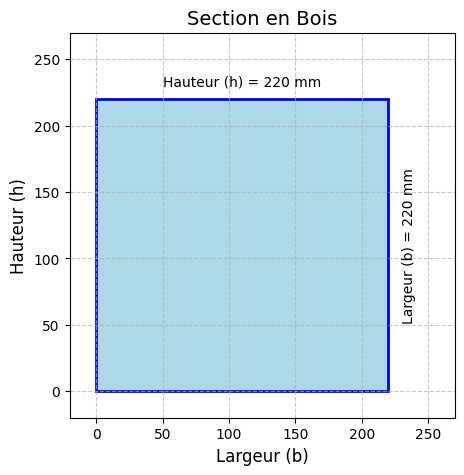

In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def dessiner_section_boise(b, h):
    """
    Dessine une section rectangulaire de bois en fonction de ses dimensions.
    :param b: largeur en mm
    :param h: hauteur en mm
    """
    fig, ax = plt.subplots(figsize=(5, 5))
    rect = patches.Rectangle((0, 0), b, h, linewidth=2, edgecolor='blue', facecolor='lightblue')

    # Ajouter le rectangle de bois
    ax.add_patch(rect)

    # Ajouter les dimensions
    plt.text(b / 2, h + 10, f"Hauteur (h) = {h} mm", ha='center', fontsize=10, color='black')
    plt.text(b + 10, h / 2, f"Largeur (b) = {b} mm", va='center', rotation=90, fontsize=10, color='black')

    # Ajuster les limites du graphique
    ax.set_xlim(-20, b + 50)
    ax.set_ylim(-20, h + 50)
    ax.set_aspect('equal', adjustable='box')
    
    # Ajouter des titres et étiquettes
    plt.title("Section en Bois", fontsize=14)
    plt.xlabel("Largeur (b)", fontsize=12)
    plt.ylabel("Hauteur (h)", fontsize=12)
    plt.grid(visible=True, linestyle='--', alpha=0.7)
    
    # Afficher le graphique
    plt.show()

dessiner_section_boise(b, h)
